# **CAR INSURANCE CLAIM PREDICTION**

## **PROBLEM STATEMENT**
In auto insurance industries, accurately identifying customers who are likely to file a claim 
is crucial to be able to manage risk, provide optimal premiums and also reduce fraudulent losses. An insurance company has tasked you to build a predictive model that can estimate the probabiliby of a customer filing a claim based on available data collected by the insurance company. 

## **OBJECTIVES**
The objective of this project is to:
- Explore and Apply various feature engineering techniques to improve model interpretability
- To build classification models that predict the likelihood of a policyholder filing a claim
- To improve the AUC-ROC score from by around 10% through hyperparameter tuning of the best-performing models

## **DATA UNDERSTANDING**


## **COLUMN DESCRIPTION**
The dataset for this project is from [Kaggle](https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification?select=train.csv) and it contains various information of determining whether a policyholder will file a claim or not

The column names and their description is as follows:


 <img src = "https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F9583913%2F8de49a1611548cbb48f5b94f27416f46%2F1.png?generation=1668437786757096&alt=media" width = "1000"/> <br> 
 <img src = "https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F9583913%2F4156d37a2440fbfb6d4e0be279b9fcb9%2F2.png?generation=1668438349301554&alt=media" width = "1000"/>

### IMPORT THE NECESSARY LIBRARIES

In [1416]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score,roc_curve, auc, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.stats import chi2_contingency
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### *LOAD THE DATASET*

In [1398]:
# Load dataset 
df = pd.read_csv("./data/CarInsurance.csv").copy()
pd.set_option('display.max_columns', None) 

# Display first 5 rows
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [1399]:
# Display the summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [1400]:
#Display the number of rows and columns
display(df.shape)

(58592, 44)

In [1401]:
#Display summary Statistics
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


# selecting the features

In [1402]:
# Display the column names
display(df.columns)

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

### *Display the unique categories and their count for each column (cardinality)*
This helps in to identifying features with high number of unique categories which are not useful for prediction and those that require preprocessing e.g., inconsistent strings,mixed datatypes, encoding, scaling, etc

In [1403]:

for col in df.columns:
    #if df[col].dtype == 'object':
        print(f"column: {col}, Total unique categories: {df[col].nunique()}, data type: {df[col].dtype}")
        print(df[col].value_counts())
        print("\n")

column: policy_id, Total unique categories: 58592, data type: object
ID51721    1
ID31908    1
ID48837    1
ID05788    1
ID45043    1
          ..
ID19188    1
ID19225    1
ID06075    1
ID06765    1
ID16274    1
Name: policy_id, Length: 58592, dtype: int64


column: policy_tenure, Total unique categories: 58592, data type: float64
1.167538    1
0.083828    1
0.073493    1
0.135073    1
0.123339    1
           ..
0.666820    1
0.347605    1
0.441174    1
0.986366    1
1.215153    1
Name: policy_tenure, Length: 58592, dtype: int64


column: age_of_car, Total unique categories: 49, data type: float64
0.01    6362
0.00    5257
0.02    5189
0.03    4415
0.04    3763
0.05    3342
0.10    3123
0.06    3053
0.07    2888
0.08    2730
0.09    2643
0.12    2506
0.11    2442
0.13    2315
0.14    2151
0.15    1964
0.16    1291
0.17     931
0.18     738
0.19     458
0.20     287
0.21     172
0.22     148
0.23      90
0.24      65
0.25      46
0.30      32
0.27      29
0.31      26
0.28      25
0.26

# **DATA PREPARATION**

#### ***DROP IDS***

In [1404]:
# drop useless column
df.drop(['policy_id'],axis=1, inplace=True)
df.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


### ***CHECK FOR FOR CLASS IMBALANCE***

In [1405]:
# check if the dataset is imbalanced in percentage
df['is_claim'].value_counts(normalize=True)

0    0.936032
1    0.063968
Name: is_claim, dtype: float64

***Insight:*** The dataset is heavily imbalanced with approximately **6.4%** positive claims and **93.6%** negative claims. To ensure both train and test sets preserve this distribution, **stratification** is performed

### ***SPLIT INTO TEST AND TRAIN***
This is done at this point to avoid data leakage later on when performing cleaing and preprocessing

In [1406]:
# Split the data into X and y
y = df['is_claim']
X = df.drop(columns=['is_claim'])

In [1407]:
# perform a train-test split using stratify
from sklearn.model_selection import StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y , test_size=0.2, random_state=42)

In [1408]:
# confirm the distribution after the split
print("Train distribution:\n", y_train.value_counts(normalize=True))
print("Test distribution:\n", y_test.value_counts(normalize=True))

Train distribution:
 0    0.93604
1    0.06396
Name: is_claim, dtype: float64
Test distribution:
 0    0.936001
1    0.063999
Name: is_claim, dtype: float64


# **DATA CLEANING**

## **1.Check for missing values**

In [1409]:
# display columns with missing values
missing_values_X_train = X_train.isnull().sum().sum()
missing_values_X_test= X_test.isnull().sum().sum()
print("Missing values in train:", missing_values_X_train)
print("Missing values in test:", missing_values_X_test)

Missing values in train: 0
Missing values in test: 0


## **2.Check for duplicates**

In [1410]:
# check for duplicates
duplicates_train = X_train.duplicated().sum()
duplicates_test = X_test.duplicated().sum()

print("Duplicate rows in train:", duplicates_train)
print("Duplicate rows in test:", duplicates_test)

Duplicate rows in train: 0
Duplicate rows in test: 0


## **3.Confirm correct string formatting**

In [1411]:
# check for correct string formatting
object_columns = X_train.select_dtypes(include='object').columns

for col in object_columns:
    print(f"Column: {col},  unique value count: {X_train[col].nunique()} \n")
    print(f"Unique values: {X_train[col].unique()}\n\n")



Column: area_cluster,  unique value count: 22 

Unique values: ['C5' 'C13' 'C8' 'C12' 'C3' 'C14' 'C6' 'C4' 'C1' 'C2' 'C9' 'C19' 'C10'
 'C15' 'C7' 'C16' 'C22' 'C11' 'C17' 'C21' 'C18' 'C20']


Column: segment,  unique value count: 6 

Unique values: ['C1' 'B1' 'B2' 'A' 'C2' 'Utility']


Column: model,  unique value count: 11 

Unique values: ['M2' 'M8' 'M6' 'M1' 'M4' 'M5' 'M7' 'M10' 'M3' 'M9' 'M11']


Column: fuel_type,  unique value count: 3 

Unique values: ['Petrol' 'CNG' 'Diesel']


Column: max_torque,  unique value count: 9 

Unique values: ['113Nm@4400rpm' '82.1Nm@3400rpm' '60Nm@3500rpm' '250Nm@2750rpm'
 '200Nm@3000rpm' '85Nm@3000rpm' '91Nm@4250rpm' '200Nm@1750rpm'
 '170Nm@4000rpm']


Column: max_power,  unique value count: 9 

Unique values: ['88.50bhp@6000rpm' '55.92bhp@5300rpm' '40.36bhp@6000rpm'
 '113.45bhp@4000rpm' '88.77bhp@4000rpm' '61.68bhp@6000rpm'
 '67.06bhp@5500rpm' '97.89bhp@3600rpm' '118.36bhp@5500rpm']


Column: engine_type,  unique value count: 11 

Unique values: ['

# **4.Convert to correct data type**

### ***Check the datatype***
Check for categorical features disguised as numeric features 

In [1412]:
print(X_train.dtypes)

policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type                    object
gear_box                        

In [1419]:
# Convert make from float to object 
X_train['make'] = X_train['make'].astype(str)
X_test['make'] = X_test['make'].astype(str)

# confirm it is of type object
print(X_train['make'].dtype)

object


# display summary statistics

In [1420]:
X_train.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
count,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000
mean,0.612408,0.069343,0.469697,18829.491946,3.137862,1163.143345,3.628272,5.245536,4.853295,3851.108143,1672.481983,1553.453203,1385.409788,1.763787
std,0.414739,0.056389,0.122799,17660.971421,1.833305,266.068922,0.483271,0.430409,0.227930,311.079047,111.985636,79.672626,212.480747,1.390179
min,0.002735,0.000000,0.288462,290.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000
25%,0.209692,0.020000,0.375000,6112.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,0.000000
50%,0.575494,0.060000,0.451923,8794.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,2.000000
75%,1.040034,0.110000,0.548077,27003.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,3.000000
max,1.396641,1.000000,1.000000,73430.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,5.000000


## **DATA PREPROCESSING** 

## **1.Check for highly correlated features**
### ***(I). High correlation in numeric features***

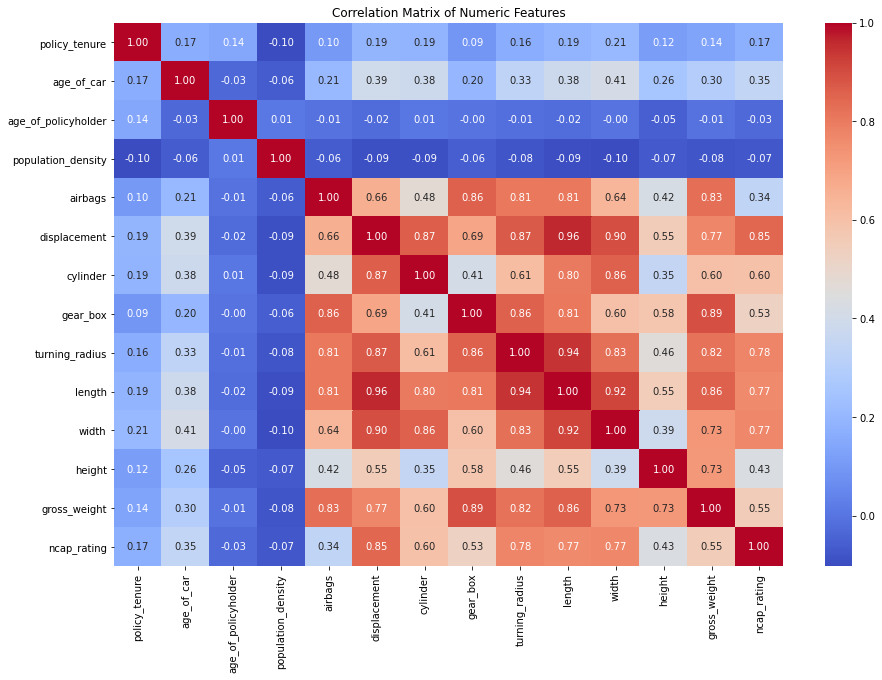

In [1421]:
# Correlation matrix for numeric features
numeric_cols = X_train.select_dtypes(include='number').columns
corr_matrix = X_train[numeric_cols].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [1422]:
#print pairs with high correlation for easier selection
high_corr = []
threshold = 0.8
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
print("Highly correlated pairs (>|0.8|):\n")
for pair in high_corr:
    print(f"{pair[0]} & {pair[1]}: correlation = {pair[2]:.2f}")




Highly correlated pairs (>|0.8|):

cylinder & displacement: correlation = 0.87
gear_box & airbags: correlation = 0.86
turning_radius & airbags: correlation = 0.81
turning_radius & displacement: correlation = 0.87
turning_radius & gear_box: correlation = 0.86
length & airbags: correlation = 0.81
length & displacement: correlation = 0.96
length & cylinder: correlation = 0.80
length & gear_box: correlation = 0.81
length & turning_radius: correlation = 0.94
width & displacement: correlation = 0.90
width & cylinder: correlation = 0.86
width & turning_radius: correlation = 0.83
width & length: correlation = 0.92
gross_weight & airbags: correlation = 0.83
gross_weight & gear_box: correlation = 0.89
gross_weight & turning_radius: correlation = 0.82
gross_weight & length: correlation = 0.86
ncap_rating & displacement: correlation = 0.85


*Insight* - From the correlation matrix features with correlation coefficient grater tha 0.80 are identified as highly correlated. 
For example: `displacement` and `length` have `0.96`, `gear_box` and `gross_weight` have `0.89`. 


The decision of which feature to keep was based on domain knowledge, which feature has a direct explainable assosication with the likelyhood of a claim being filed.

The features that were kept were:
- `Airbags` - They are directly linked to passenger safety and injury severity in accidents which can significantly infuence injury claims
- `ncap_rating` - This is a standardized safety rating provided by the **NCAP** based on crash tests done. This makes it a reliable feature to include in the model


#### ***Drop all highly correlated numeric features***

In [1423]:
# drop the highly correleatad columns


drop_columns = ['gear_box', 'gross_weight', 'length', 'width', 'cylinder', 'displacement', 'turning_radius', 'displacement', ]

#drop the features
X_train = X_train.drop(columns=drop_columns)
X_test = X_test.drop(columns=drop_columns)

# Get numeric columns
numeric_cols1 = X_train.select_dtypes(include='number').columns

# Get the number of numeric columns
num_numeric_cols1= len(numeric_cols1)

print("Number of numeric columns:", num_numeric_cols1)
numeric_cols1

Number of numeric columns: 7


Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'airbags', 'height', 'ncap_rating'],
      dtype='object')

#### ***Confirm there is no highly correlated features***

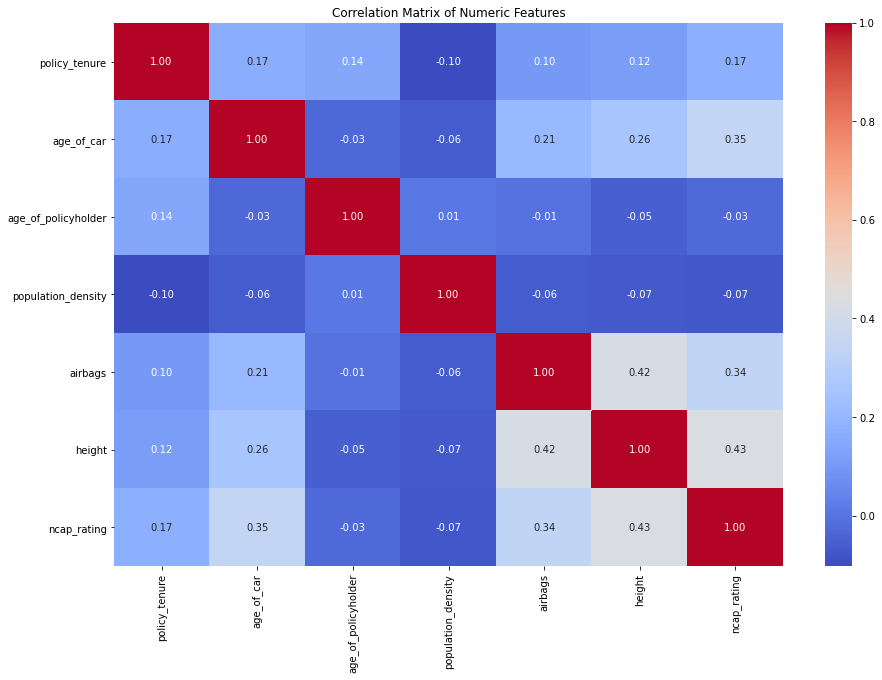

In [1424]:
#print pairs with high correlation for easier selection

numeric_cols = X_train.select_dtypes(include='number').columns
corr_matrix = X_train[numeric_cols].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


### **(II). Checking for high correlation in categorical features**

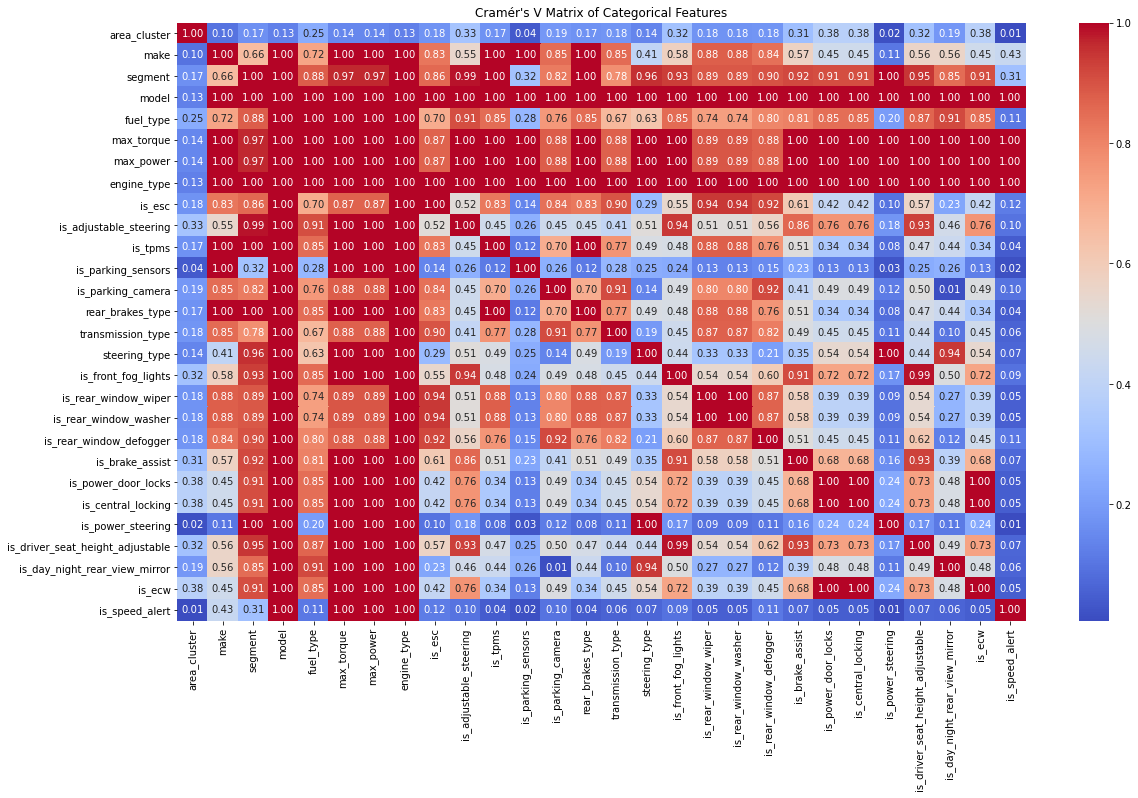

In [1425]:
# check using the Cramer's V 
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    denom = min((kcorr-1), (rcorr-1))
    if denom <= 0:
        return np.nan
    return np.sqrt(phi2corr / denom)

cat_cols = X_train.select_dtypes(include='object').columns
cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 != col2:
            cramers_results.loc[col1, col2] = cramers_v(X_train[col1], X_train[col2])
        else:
            cramers_results.loc[col1, col2] = 1.00

# Display the heatmap of Cramér's V matrix
cramers_results_float = cramers_results.astype(float)
plt.figure(figsize=(19, 11))
sns.heatmap(cramers_results_float, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramér's V Matrix of Categorical Features")
plt.show()



In [1426]:
# Pint pairs of categorical features with high Cramér's V for easier selection
high_cramers = []
threshold = 0.8
cat_cols = cramers_results.columns

for i in range(len(cat_cols)):
    for j in range(i):
        value = float(cramers_results.iloc[i, j])
        if value > threshold:
            high_cramers.append((cat_cols[i], cat_cols[j], value))

print("Highly associated categorical pairs (Cramér's V > 0.8):\n")
for pair in high_cramers:
    print(f"{pair[0]} & {pair[1]}: Cramér's V = {pair[2]:.2f}")

Highly associated categorical pairs (Cramér's V > 0.8):

model & make: Cramér's V = 1.00
model & segment: Cramér's V = 1.00
fuel_type & segment: Cramér's V = 0.88
fuel_type & model: Cramér's V = 1.00
max_torque & make: Cramér's V = 1.00
max_torque & segment: Cramér's V = 0.97
max_torque & model: Cramér's V = 1.00
max_torque & fuel_type: Cramér's V = 1.00
max_power & make: Cramér's V = 1.00
max_power & segment: Cramér's V = 0.97
max_power & model: Cramér's V = 1.00
max_power & fuel_type: Cramér's V = 1.00
max_power & max_torque: Cramér's V = 1.00
engine_type & make: Cramér's V = 1.00
engine_type & segment: Cramér's V = 1.00
engine_type & model: Cramér's V = 1.00
engine_type & fuel_type: Cramér's V = 1.00
engine_type & max_torque: Cramér's V = 1.00
engine_type & max_power: Cramér's V = 1.00
is_esc & make: Cramér's V = 0.83
is_esc & segment: Cramér's V = 0.86
is_esc & model: Cramér's V = 1.00
is_esc & max_torque: Cramér's V = 0.87
is_esc & max_power: Cramér's V = 0.87
is_esc & engine_type

***Insight***

From the Cramer's V matrix, there are several categorical features showed a strong associations (0.8 and above), with some even reaching perfect correlation of 1.00. These highly indicate redundancy, which could negatively impact model performance. 

Examples are: 
- `model` and `is_speed_alert` with a correlation of `1.00`
- `max_power` and `transmission_type` with a correlation of `0.88`. 


As with numeric numeric features, the decision of which categorical feature to keep was based on domain knowledge -specifically, which feature has a direct explainable assosication with the likelihood of a claim being filed.

Each of the attributes have a high relationship with one another and thus only one is choosen from the lot.
The feature retained was: Model as it summarizes several other attributes  like power , safety feature, transimssion,... And others can 
be derived from it. 


#### ***Drop all highly correlated categorical features***

In [1427]:
cat_col_drop = [
     'segment', 'fuel_type', 'max_torque', 'make',
    'max_power', 'transmission_type','engine_type', 'is_adjustable_steering', 
    'is_tpms', 'is_parking_sensors', 'rear_brakes_type', 
     'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper', 
    'is_rear_window_washer',  
    'is_central_locking',  'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 
    'is_ecw', 'is_esc', 'is_parking_camera', 'is_brake_assist', 'is_speed_alert',
    'is_power_door_locks', 'is_power_steering', 'is_rear_window_defogger'
]


categorical_cols = X_train.select_dtypes(include='object').columns
X_train = X_train.drop(columns=cat_col_drop, axis=1)
X_test = X_test.drop(columns=cat_col_drop, axis=1)


#confirm only the two are present
X_train.select_dtypes(include='object').columns
# X_train.drop(columns=num_cols_keep, inplace=True)
X_train.columns



Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'model', 'airbags', 'height', 'ncap_rating'],
      dtype='object')

#### ***Verify the remaining columns have no high correlation***

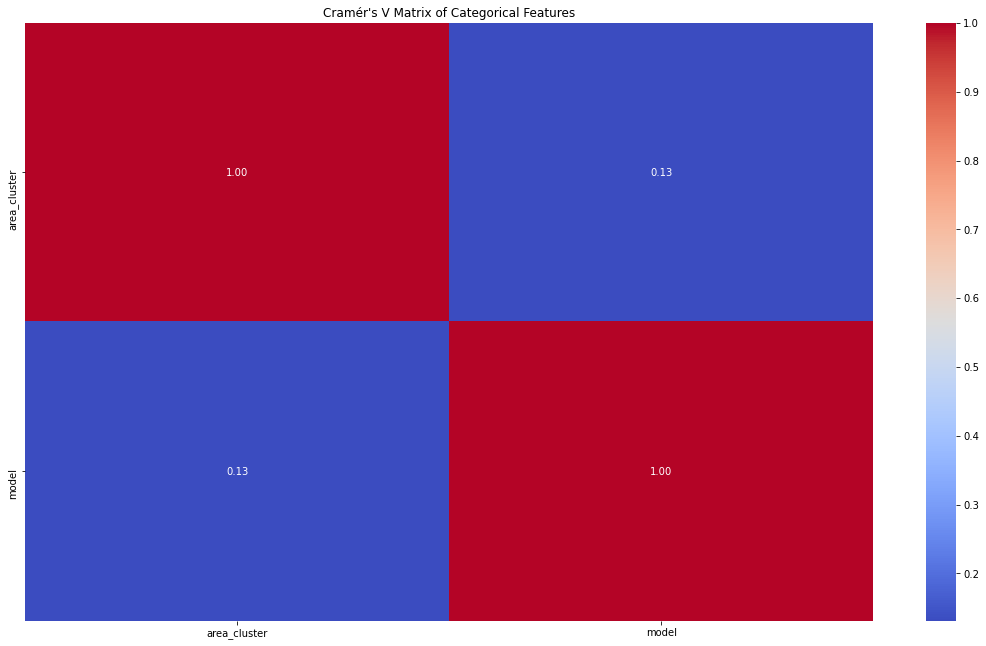

In [1428]:

# Verify the remaining columns have no strong correlation


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_cols = X_train.select_dtypes(include='object').columns
cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 != col2:
            cramers_results.loc[col1, col2] = cramers_v(X_train[col1], X_train[col2])
        else:
            cramers_results.loc[col1, col2] = 1.00

# Display the heatmap of Cramér's V matrix
cramers_results_float = cramers_results.astype(float)
plt.figure(figsize=(19, 11))
sns.heatmap(cramers_results_float, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramér's V Matrix of Categorical Features")
plt.show()


In [1429]:
# Total number of Categorical columns
print(X_train.select_dtypes(include='object').columns)

Index(['area_cluster', 'model'], dtype='object')


In [1430]:
# Total number of columns left
print(X_train.columns)
len(X_train.columns)


Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'model', 'airbags', 'height', 'ncap_rating'],
      dtype='object')


9

The original dataset had `44` columns but after performing correlation analysis including `Pearson correlation` for numerical features and` Cramer's V` for categorical features, the highly redundant columns were identified and removed. This reduced the dataset to `9` non-redundant features, indicating there was significant **multicollinearity**. 

With a cleaner feature set, the next step of preprocessing can be carried out

## **2. Check for skewness in data**

This is done on all numeric columns 

Skewness of numerical features:
 population_density     1.673469
height                 1.038330
age_of_car             1.010484
airbags                0.904408
age_of_policyholder    0.644099
ncap_rating            0.083777
policy_tenure          0.047993
dtype: float64


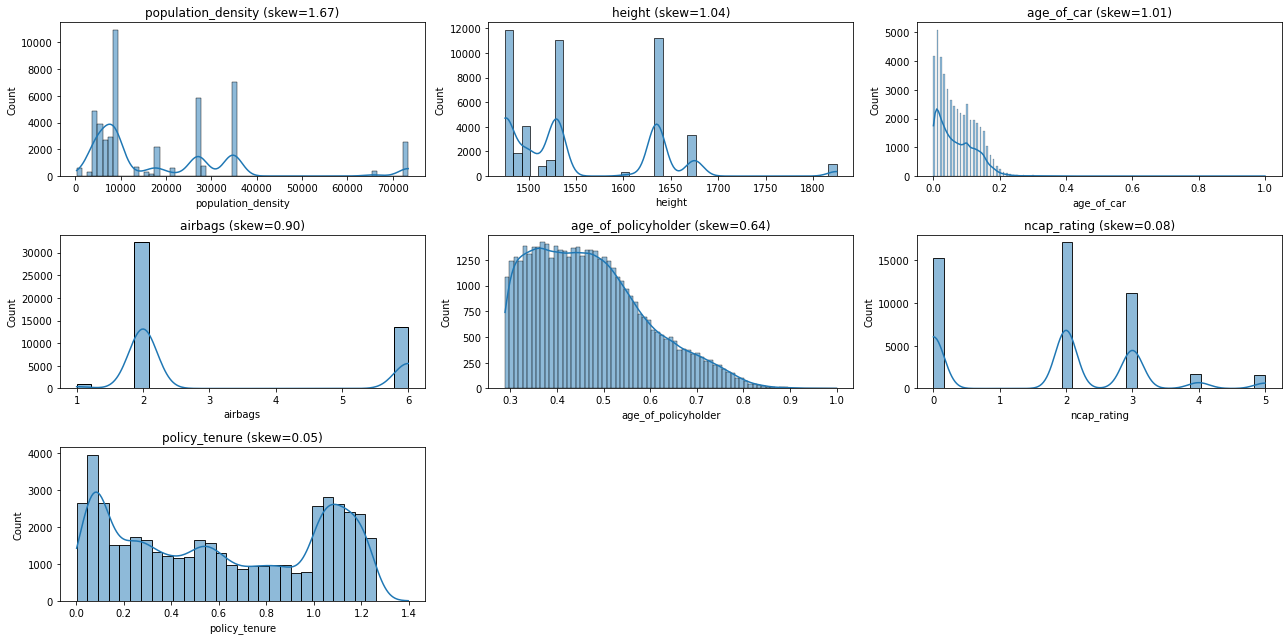

In [1431]:
import math

numeric_cols = X_train.select_dtypes(include='number').columns
skewness = X_train[numeric_cols].skew().sort_values(ascending=False)
print("Skewness of numerical features:\n", skewness)

# Set up the subplot grid
n_cols = 3  # Number of columns in the grid
n_rows = math.ceil(len(skewness) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 3 * n_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

for i, col in enumerate(skewness.index):
    sns.histplot(X_train[col], kde=True, ax=axes[i])
    axes[i].set_title(f"{col} (skew={skewness[col]:.2f})")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

***Insight:*** The plot reveals that several features, like `population_density`, `height`, `age_of_car`, and `airbags`, are right-skewed, showing that most values are concentrated at the lower end. From data understanding this suggests, that most cars are relatively new, have fewer airbags, and are of average height, while only a small number have much higher values. The `age_of_policyholder` feature is also right-skewed, meaning most policyholders are younger.

However, features like `ncap_rating` and `policy_tenure` are nearly symmetric, showing a balanced distribution across their ranges. Highly skewed features may benefit from transformation (log transformation) to reduce skewness, which can help improve the performance and stability of machine learning models.

## **3. Perform transformation**

In [1432]:
# transform the highly skewed features and the moderately skewed features

from sklearn.preprocessing import FunctionTransformer
skewed_features = ['population_density', 'height', 'age_of_car', 'airbags', 'age_of_policyholder']

# Log1p transformer 
log_transformer = FunctionTransformer(np.log1p, validate=True)  

# Apply to skewed features
X_train[skewed_features] = log_transformer.fit_transform(X_train[skewed_features])
X_test[skewed_features] = log_transformer.transform(X_test[skewed_features])


In [1433]:
# confirm the skewness of the features has been handled
numeric_cols = X_train.select_dtypes(include='number').columns
skewness = X_train[numeric_cols].skew().sort_values(ascending=False)
print("Skewness of numerical features:\n", skewness)

Skewness of numerical features:
 height                 0.924394
airbags                0.836341
age_of_car             0.752415
age_of_policyholder    0.474758
ncap_rating            0.083777
policy_tenure          0.047993
population_density    -0.450551
dtype: float64


***Insight from confirmation***

The features that had an improvement after skewing were `population_density`(from 1.673469 to -0.450551) and `age_of_policyholder` (from 0.644099 to  0.474758). A meaningful reduction in skewness generally in this case reducing from over 0.8 to under 0.5. Make, height and airbags are still highly skewed with over 0.83. Possibility of why some features didn't resopond well to is if data has small integers, was already normalized

### ***Undoing transformation for some features***
The reason for undoing the transformation is to reduce unnecessary complexity. The features that remain skewed( > 0.5) are reverted back, as the transformation reduced skewness but not significantly enough to make a strong impact on model performance

In [1434]:
# Unding transformation of these features
X_train['height'] = np.expm1(X_train['height'])
X_train['age_of_car'] = np.expm1(X_train['age_of_car'])
X_train['airbags'] = np.expm1(X_train['airbags'])

X_test['height'] = np.expm1(X_test['height'])
X_test['age_of_car'] = np.expm1(X_test['age_of_car'])
X_test['airbags'] = np.expm1(X_test['airbags'])


In [1435]:
X_train['age_of_car'][:10]

47135    0.18
58128    0.09
35000    0.03
6078     0.08
34780    0.01
19269    0.07
45356    0.17
48359    0.19
48178    0.06
36991    0.05
Name: age_of_car, dtype: float64

## **4. Feature encoding**
Encode categorical features which converts them to numeric format that the models can understand

In [1436]:
# list the categorical features
print(X_train.select_dtypes('object').columns)

Index(['area_cluster', 'model'], dtype='object')


In [1437]:
# One-hot encode both test and train
X_train = pd.get_dummies(X_train, columns=['area_cluster', 'model'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['area_cluster', 'model'], drop_first=True)

# ensure the test and train have same columns
X_train_encoded, X_test_encoded = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [1438]:
# preview the result of one hot encoding
X_train.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,height,ncap_rating,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9
47135,0.293321,0.18,0.386047,10.455618,2.0,1515.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
58128,0.393585,0.09,0.290083,8.596189,2.0,1675.0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
35000,1.068827,0.03,0.473603,9.081939,2.0,1530.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
6078,0.603159,0.08,0.497273,10.455618,2.0,1530.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
34780,0.830327,0.01,0.424513,8.596189,2.0,1475.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1439]:
#view all columns
X_train.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'airbags', 'height', 'ncap_rating',
       'area_cluster_C10', 'area_cluster_C11', 'area_cluster_C12',
       'area_cluster_C13', 'area_cluster_C14', 'area_cluster_C15',
       'area_cluster_C16', 'area_cluster_C17', 'area_cluster_C18',
       'area_cluster_C19', 'area_cluster_C2', 'area_cluster_C20',
       'area_cluster_C21', 'area_cluster_C22', 'area_cluster_C3',
       'area_cluster_C4', 'area_cluster_C5', 'area_cluster_C6',
       'area_cluster_C7', 'area_cluster_C8', 'area_cluster_C9', 'model_M10',
       'model_M11', 'model_M2', 'model_M3', 'model_M4', 'model_M5', 'model_M6',
       'model_M7', 'model_M8', 'model_M9'],
      dtype='object')

## **5. Feature Scaling**

In [1440]:
numeric_features = X_train.select_dtypes(include=['float64', 'int64'])
numeric_features.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,height,ncap_rating
47135,0.293321,0.18,0.386047,10.455618,2.0,1515.0,2
58128,0.393585,0.09,0.290083,8.596189,2.0,1675.0,2
35000,1.068827,0.03,0.473603,9.081939,2.0,1530.0,2
6078,0.603159,0.08,0.497273,10.455618,2.0,1530.0,2
34780,0.830327,0.01,0.424513,8.596189,2.0,1475.0,0


In [1441]:
# Store numeric columns in a variable
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns

#Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and te  st
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


In [1442]:
# check the scaled and the whole dataframe to ensure everything is ok
X_train.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,height,ncap_rating,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9
47135,-0.769378,1.962404,0.053567,1.072532,-0.620668,-0.482645,0.169917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
58128,-0.527624,0.366329,-1.118040,-0.879110,-0.620668,1.525594,0.169917,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
35000,1.100508,-0.697721,1.122521,-0.369271,-0.620668,-0.294373,0.169917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
6078,-0.022301,0.188987,1.411501,1.072532,-0.620668,-0.294373,0.169917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
34780,0.525442,-1.052405,0.523195,-0.879110,-0.620668,-0.984705,-1.268762,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Check for class imbalance
Check for imbalance in the target variable 
To determine if rebalancing is needed either via smote or undersampling the major class

In [1443]:
# check the distribution to confirm imbalance
print("Train distribution:\n", y_train.value_counts(normalize=True))

Train distribution:
 0    0.93604
1    0.06396
Name: is_claim, dtype: float64


***Observation:*** The dataset is heavily imbalanced with approximately **6.4%** positive claims and **93.6%** negative claims. 

`SMOTE`was performed however it was later seen to reduce the model performance by some points thus the alternative of using the parameter `class_weight='balanced'` worked well 

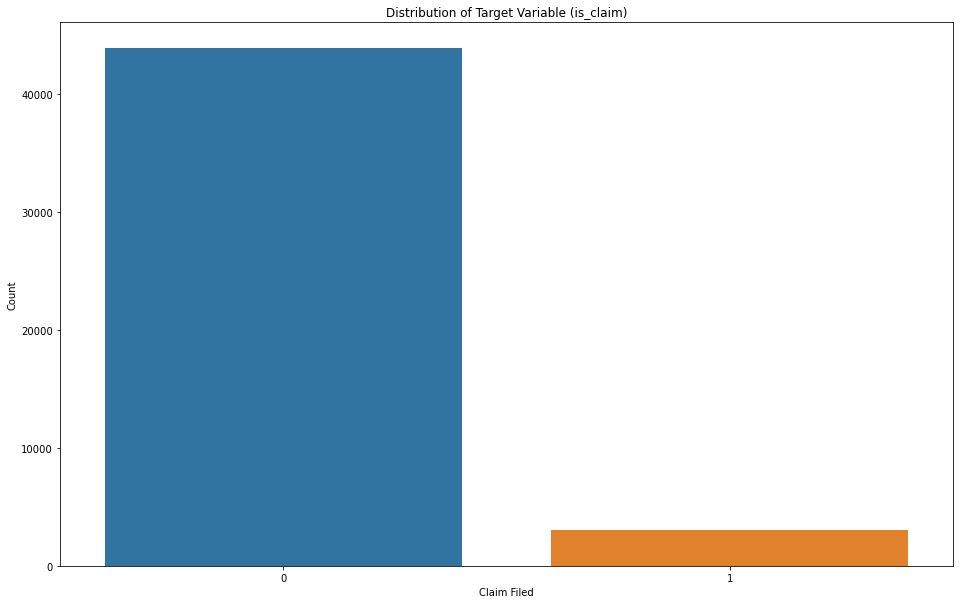

In [1444]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
sns.countplot(x=y_train)
plt.title('Distribution of Target Variable (is_claim)')
plt.xlabel('Claim Filed')
plt.ylabel('Count')
plt.show()

***Insight:*** As you can see, the dataset is heavily imbalanced. The vast majority of policyholders do not file a claim (class 0) while only a small fraction filed a claim (class 1).

## ***BUILDING BASELINE MODELS***

## 1. Logistic Regression Model

In [1445]:
# create a function to call multiple times to evaluate performance after each change


 # Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

 # Perform 5-fold cross-validation
log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='roc_auc')

 # Display results
print("Logistic Regression ROC-AUC Scores:", log_reg_scores)
print("Logistic Regression Average ROC-AUC:", np.mean(log_reg_scores))

Logistic Regression ROC-AUC Scores: [0.59627483 0.6282944  0.60060361 0.61287578 0.61544607]
Logistic Regression Average ROC-AUC: 0.6106989372918143


## 2.Decision Tree

In [1446]:
#Initialize models
decision_tree = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation
tree_scores = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring= 'roc_auc')

# Display results
print("Decision Tree ROC-AUC Scores:", tree_scores)
print("Decision Tree Average ROC-AUC:", np.mean(tree_scores))

Decision Tree ROC-AUC Scores: [0.49507835 0.51211538 0.50345442 0.50323474 0.50443132]
Decision Tree Average ROC-AUC: 0.503662840251321


### ***Visualizing the performance of both models using the ROC-AUC curve on the train data***

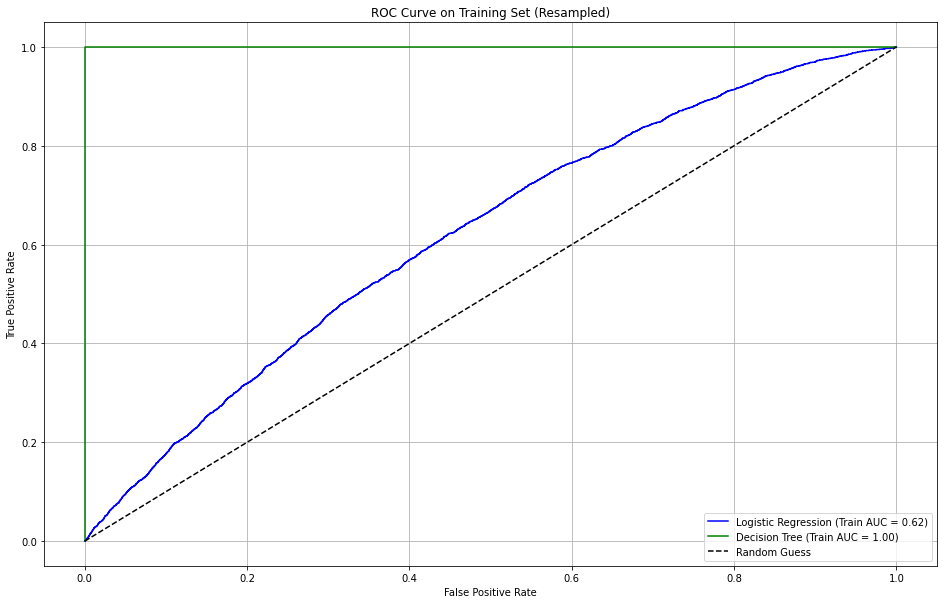

In [1447]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit on resampled training set
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

#call predict_proba
log_reg_train_probs = log_reg.predict_proba(X_train)[:, 1]
tree_train_probs = decision_tree.predict_proba(X_train)[:, 1]

#Predict on train 
log_reg_train_probs = log_reg.predict_proba(X_train)[:, 1]
tree_train_probs = decision_tree.predict_proba(X_train)[:, 1]

#ROC curve
fpr_log_train, tpr_log_train, _ = roc_curve(y_train, log_reg_train_probs)
fpr_tree_train, tpr_tree_train, _ = roc_curve(y_train, tree_train_probs)

# calculate AUC score
auc_log_train = auc(fpr_log_train, tpr_log_train)
auc_tree_train = auc(fpr_tree_train, tpr_tree_train)

#Plot 
plt.figure(figsize=(16, 10))
plt.plot(fpr_log_train, tpr_log_train, label=f'Logistic Regression (Train AUC = {auc_log_train:.2f})', color='blue')
plt.plot(fpr_tree_train, tpr_tree_train, label=f'Decision Tree (Train AUC = {auc_tree_train:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.title('ROC Curve on Training Set (Resampled)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


***Obervation:*** From the ROC curve visualization on the training data, Logistic Regression achieved an auc of 0.62, indicating the models ability to distinquish between classes. In contrast the decision tree showed an auc of 1.00 which is a high sign of overfitting, suggesting decision tree has memorized  the train set and may not generalize well on unseen data.

Testing both models on the test set is necessary to evaluate their real-world performance


### ***Evaluate the performance of the models on the test set*** 

In [1448]:
# Fit on resampled training set
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

#call predict_proba
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]
tree_probs = decision_tree.predict_proba(X_test)[:, 1]

#Predict on train 
log_reg_auc = roc_auc_score(y_test, log_reg_probs)
tree_auc = roc_auc_score(y_test, tree_probs)

print("Logistic Regression ROC-AUC on Test Set:", log_reg_auc)
print("Decision Tree ROC-AUC on Test Set:", tree_auc)

Logistic Regression ROC-AUC on Test Set: 0.5860898896891238
Decision Tree ROC-AUC on Test Set: 0.5109410155893883


### ***Visualizing the performance of both models using the ROC-AUC curve on the `test` data***

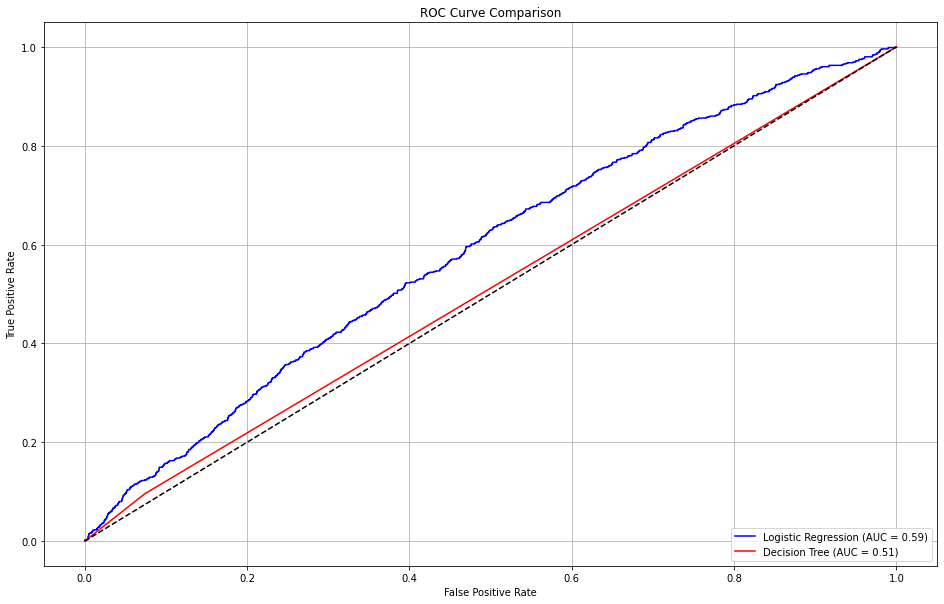

In [1449]:
#Get FPR, TPR for both models
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg_probs)
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_probs)

# Calculate AUC
roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Plot the ROC curves
plt.figure(figsize=(16, 10))
plt.plot(fpr_log, tpr_log, color='blue', label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_tree, tpr_tree, color='red', label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


***Observation:*** When evaluated on the unseen test data, the AUC score drops significantly in both:
- Logistic Regression: The AUC score decreased from 0.62 to 0.59, indicating moderate overfitting and limited generalization to new data
- Decision Tree: The AUC score dropped from 1.00 to 0.51. This suggests the model memorized the training data but failed to generalize. Its test performance is no better than random guessing

This result shows that neither model generalizes well to unseen data, with Decision Tree clearly overfitting and Logistic Regression performing slightly better. 

## ***Selecting a model to improve***

Despite its limitations. Logistic Regression shows more stable and generalizable behavior compared to Decision Tree. The drop in AUC in test data suggests room for improvement but it mainains a performance above 0.5 and avoids extreme overfitting which is seen in the decision tree. Based on this reason logistic regression is selected as the model to proceed with for further refinement including hyperparameter tuning 

In [1450]:
# create a function to call multiple times to evaluate performance after each change

def evaluate_log_reg(X, y):
 
 # Initialize models
 log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

 # Perform 5-fold cross-validation
 log_reg_scores = cross_val_score(log_reg, X, y, cv=5, scoring='roc_auc')

 # Display results
 print("Logistic Regression ROC-AUC Scores:", log_reg_scores)
 print("Logistic Regression Average ROC-AUC:", np.mean(log_reg_scores))

evaluate_log_reg(X_train, y_train)

Logistic Regression ROC-AUC Scores: [0.59627483 0.6282944  0.60060361 0.61287578 0.61544607]
Logistic Regression Average ROC-AUC: 0.6106989372918143


## More Feature Engineering 
The aim of this section is to engineer features that will be able to reveal underlying patterns in the data, enabling the Logistic Regression model to learn more effectively and improve its predictive performance

In [1451]:
#Display the dataset to have an overview
X_train.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,height,ncap_rating,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9
47135,-0.769378,1.962404,0.053567,1.072532,-0.620668,-0.482645,0.169917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
58128,-0.527624,0.366329,-1.118040,-0.879110,-0.620668,1.525594,0.169917,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
35000,1.100508,-0.697721,1.122521,-0.369271,-0.620668,-0.294373,0.169917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
6078,-0.022301,0.188987,1.411501,1.072532,-0.620668,-0.294373,0.169917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
34780,0.525442,-1.052405,0.523195,-0.879110,-0.620668,-0.984705,-1.268762,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Polynormial Transformation
Polynormial Transformation is performed to created new features by squaring existing numerical variables (`age_of_car` and `age_of_policyholder`) to help the logistic regression model capture non-linear relationships that the original linear features might miss.

In [1452]:
# Add polynomial terms
X_train['age_of_car_squared'] = X_train['age_of_car'] ** 2
X_train['age_of_policyholder_squared'] = X_train['age_of_policyholder'] ** 2

X_test['age_of_car_squared'] = X_test['age_of_car'] ** 2
X_test['age_of_policyholder_squared'] = X_test['age_of_policyholder'] ** 2


In [1453]:
X_train.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,height,ncap_rating,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,age_of_car_squared,age_of_policyholder_squared
47135,-0.769378,1.962404,0.053567,1.072532,-0.620668,-0.482645,0.169917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3.851030,0.002869
58128,-0.527624,0.366329,-1.118040,-0.879110,-0.620668,1.525594,0.169917,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.134197,1.250013
35000,1.100508,-0.697721,1.122521,-0.369271,-0.620668,-0.294373,0.169917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.486815,1.260054
6078,-0.022301,0.188987,1.411501,1.072532,-0.620668,-0.294373,0.169917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.035716,1.992335
34780,0.525442,-1.052405,0.523195,-0.879110,-0.620668,-0.984705,-1.268762,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.107556,0.273733


This can help capture non-linear patterns for logistic regression which it can't learn easily 

# Tuning Logistic Regression model

In [1345]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Define model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  #supports l1 and l2
}

# Setup GridSearchCV with 5-fold CV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best params and score
print("Best parameters:", grid_search.best_params_)
print("Best ROC-AUC score:", grid_search.best_score_)


Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC-AUC score: 0.6112356411049121


In [1454]:
# Retrain the model with the best hyperparameters
log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced',
    C=0.01,
    penalty='l2',
    solver='liblinear'
)

# Fit the model on the full training data
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')

In [1455]:
#Evaluate model performance on test data
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]

# Calculate AUC score on test data
test_auc = roc_auc_score(y_test, log_reg_probs)

print("Test ROC-AUC:", test_auc)



Test ROC-AUC: 0.5882912450238551


#### ***Visualizing Logistic Regression performance after tuning***

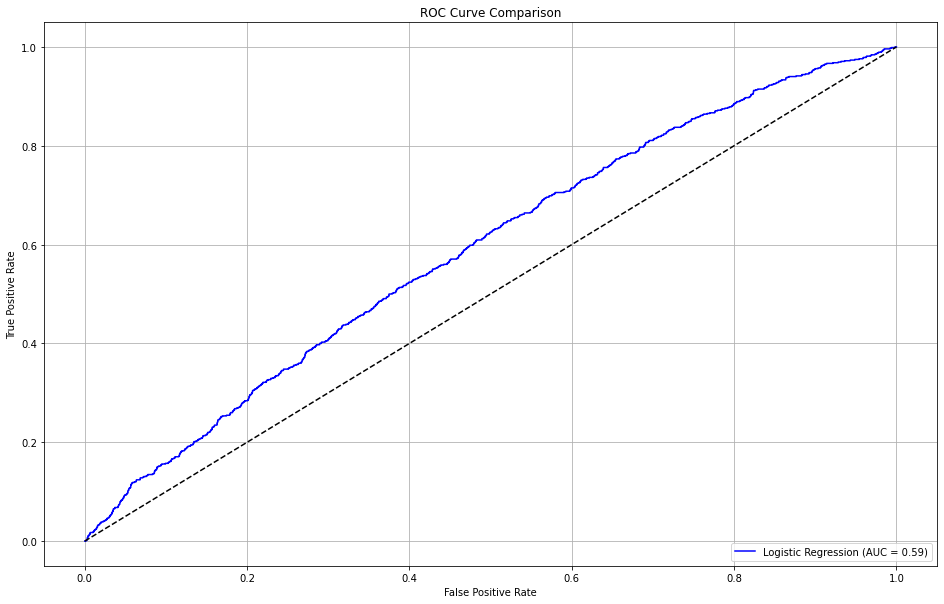

In [1456]:
#Get FPR, TPR for both models
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg_probs)

# Calculate AUC
roc_auc_log = auc(fpr_log, tpr_log)

# Plot the ROC curves
plt.figure(figsize=(16, 10))
plt.plot(fpr_log, tpr_log, color='blue', label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**Insight**

After tuning and feature selection, logistic regression consistently achieved an AUC score around 0.59, with only marginal improvements observed. For further gains, incorporating more sophisticated models can increase the AUC score.

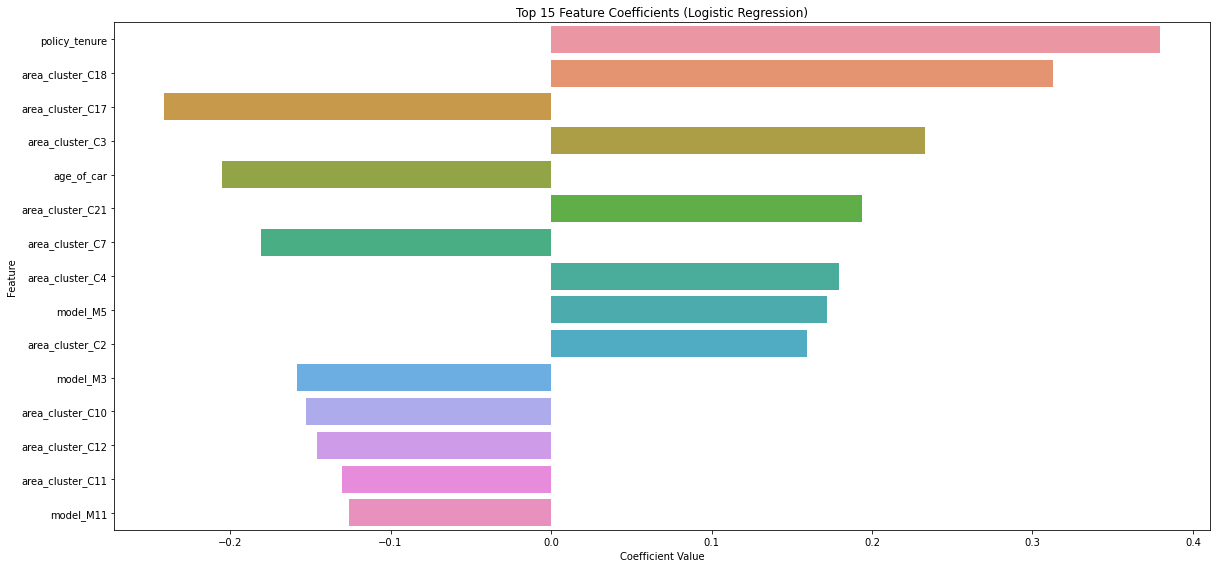

In [1457]:
# Get feature names and coefficients
features = X_train.columns
coefficients = log_reg.coef_[0]

# Get indices of top 15 features by absolute coefficient value
indices = np.argsort(np.abs(coefficients))[::-1][:15]

plt.figure(figsize=(17,8))
sns.barplot(x=coefficients[indices], y=features[indices])
plt.title("Top 15 Feature Coefficients (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

***Insight*** The bar plot shows the top 15 features (by absolute coefficient value) from the Logistic Regression model. Features like policy_tenure, several area_cluster categories, and age_of_car have the largest influence on the model's predictions. The direction (positive or negative) of each bar indicates whether the feature increases or decreases the likelihood of a claim

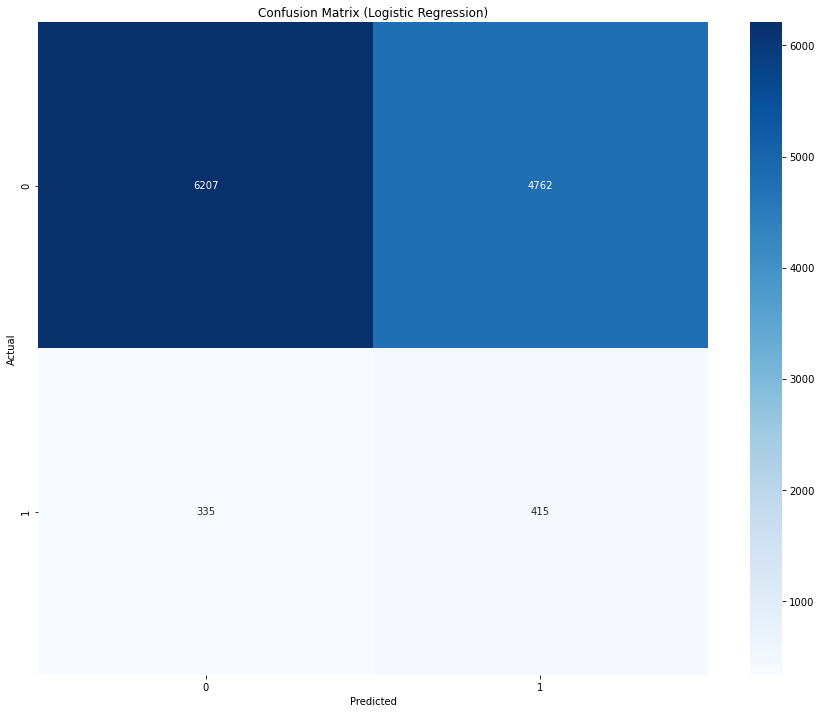

In [1458]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, log_reg.predict(X_test))
plt.figure(figsize=(15, 12))  # Set the figure size here
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

***Insight:*** The confusion matrix for the Logistic Regression model shows that while most non-claim cases (class 0) are correctly identified, a large number of them are incorrectly predicted as claims (false positives). For actual claims (class 1), the model correctly identifies some but misses many (false negatives). This highlights the challenge of predicting rare events in imbalanced datasets, where the model struggles to accurately capture the minority class.

## 4. RANDOM FOREST

#### Training basic Random Forest model

In [1464]:
def evaluate_random_forest(X, y):
    # Initialize the Random Forest model with a fixed random state for reproducibility
    rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)
    
    # Perform 5-fold cross-validation and get ROC-AUC scores
    rf_scores = cross_val_score(rf, X, y, cv=5, scoring='roc_auc', n_jobs=-1)
    
    # Print the ROC-AUC scores for each fold and their average
    print("Random Forest ROC-AUC Scores:", rf_scores)
    print("Random Forest Average ROC-AUC:", np.mean(rf_scores))

# Call the function with your training data
evaluate_random_forest(X_train, y_train)


Random Forest ROC-AUC Scores: [0.5666886  0.56445185 0.54970266 0.5652864  0.57218841]
Random Forest Average ROC-AUC: 0.5636635837189872


#### Tuning the Random Forest Model to see if its performance increases

In [1356]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Perform tuning
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best ROC-AUC score:", grid_search.best_score_)


Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best ROC-AUC score: 0.647088681832811


#### Testing the tuned Random Forest Model on the test data to see its performance on unseen data

In [1465]:
#Adding the best hyperparameters

# Initialize Random Forest with tuned parameters
rf_par = RandomForestClassifier(
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

# 3. Fit the model on the full training data
rf_par.fit(X_train, y_train)

# 4. Predict probabilities on test set (for positive class)
rf_test_probs = rf_par.predict_proba(X_test)[:, 1]

# 5. Calculate ROC-AUC on test set
test_auc = roc_auc_score(y_test, rf_test_probs)
print(f"Random Forest Test ROC-AUC: {test_auc: }")


Random Forest Test ROC-AUC:  0.6549892727991005


#### Visualizing its performance  compared with other models

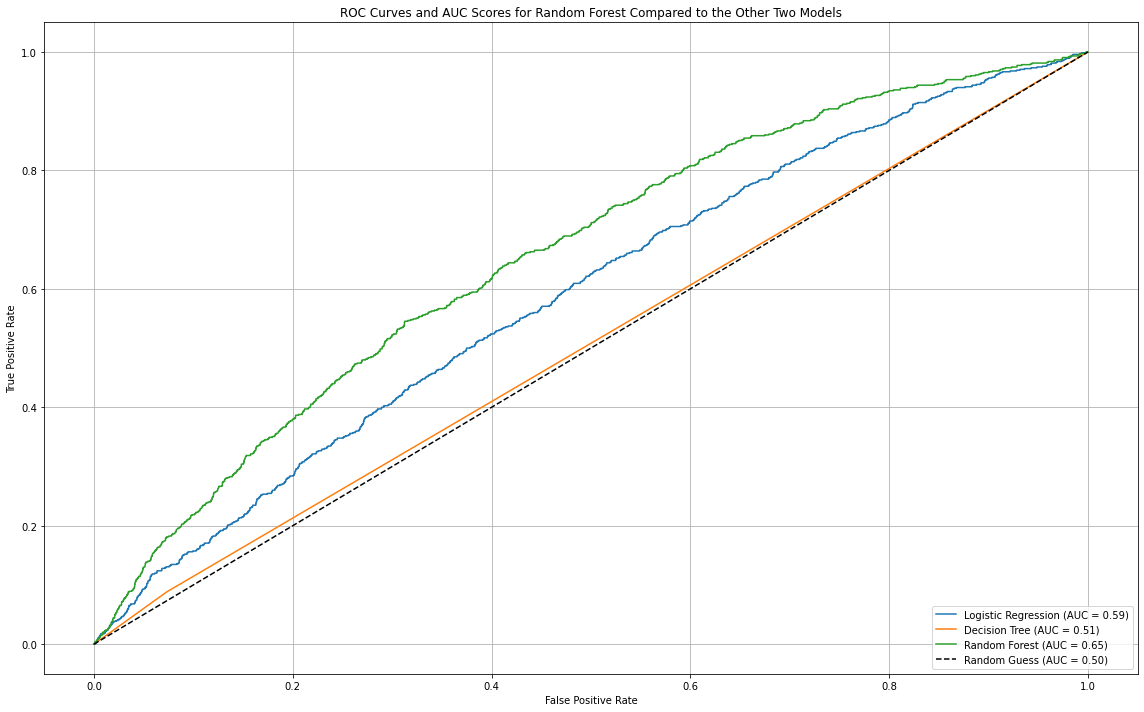

In [1467]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)  # Refit after all feature engineering
tree_probs = decision_tree.predict_proba(X_test)[:, 1]

#Get predicted probabilities for each model
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]
tree_probs = decision_tree.predict_proba(X_test)[:, 1]
rf_probs = rf_par.predict_proba(X_test)[:, 1]

#Compute ROC curves and AUCs
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg_probs)
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

auc_log = auc(fpr_log, tpr_log)
auc_tree = auc(fpr_tree, tpr_tree)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot the figures
plt.figure(figsize=(16, 10))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {auc_tree:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")

# Chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# labels and formatting
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves and AUC Scores for Random Forest Compared to the Other Two Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


***Insight:*** This ROC curve shows that the Random Forest model (AUC = 0.65) outperforms both Logistic Regression (AUC = 0.59) and Decision Tree (AUC = 0.51) in distinguishing between claim and non-claim cases.

### **4. XGBOOST**

#### Training basic basic XGBoost model

In [1468]:
# Initialize XGBoost model
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# 5-fold cross-validation with ROC-AUC scoring
xgb_scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='roc_auc')

# Display results
print("XGBoost ROC-AUC Scores:", xgb_scores)
print("XGBoost Average ROC-AUC:", np.mean(xgb_scores))


XGBoost ROC-AUC Scores: [0.60996828 0.61497388 0.59971491 0.62664146 0.6213211 ]
XGBoost Average ROC-AUC: 0.6145239267408327


#### Tuning the XGBoost Model to see if its performance increases

In [1362]:
# get best parameters
xgb = XGBClassifier(random_state=42,eval_metric='logloss')

# hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1,
    verbose=1
)

#Fit the model
grid_search.fit(X_train, y_train)

#Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score (CV):", grid_search.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 13.6min finished


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best ROC-AUC Score (CV): 0.6521241153426016


#### Testing the tuned XGBoost Model on the test data to see its performance on unseen data

In [1469]:
# Initialize XGBoost with best parameters
xgb_par = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

# Fit the model on full training data
xgb_par.fit(X_train, y_train)

# Predict probabilities on the test set
xgb_test_probs = xgb_par.predict_proba(X_test)[:, 1]

# Evaluate using ROC-AUC on test set
xgb_test_auc = roc_auc_score(y_test, xgb_test_probs)
print(f"XGBoost Test ROC-AUC: {xgb_test_auc:.4f}")


XGBoost Test ROC-AUC: 0.6583


#### Visualizing its performance  compared with other models

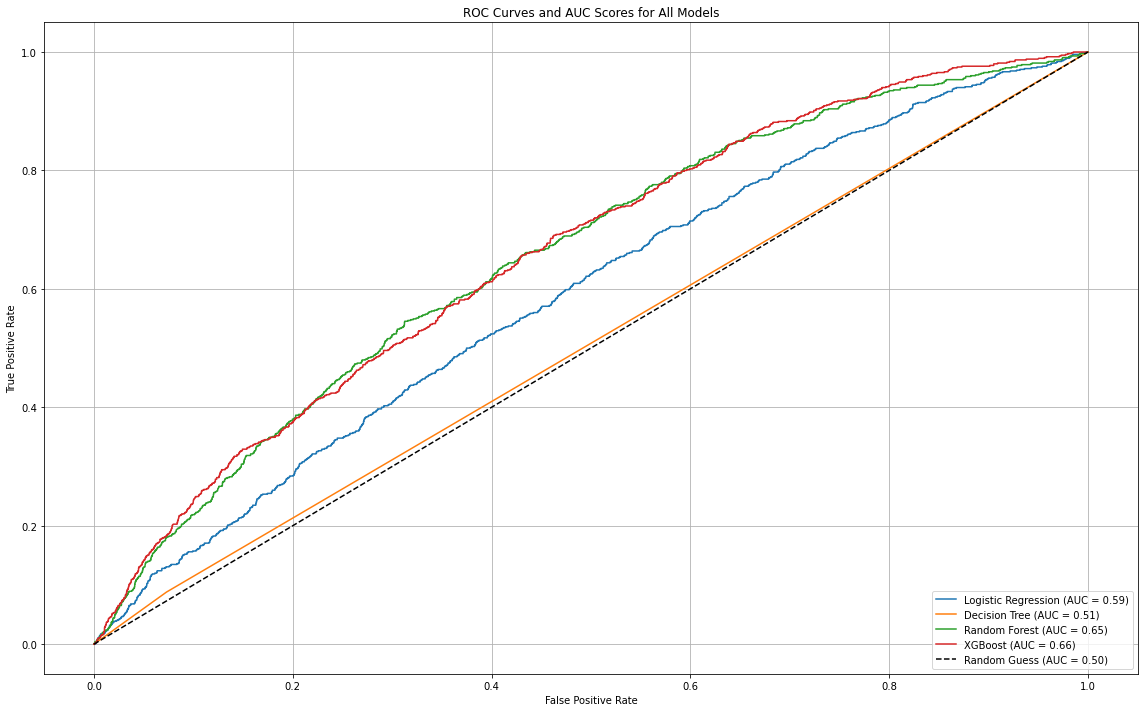

In [1470]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Get predicted probabilities for each model
log_reg_probs = log_reg.predict_proba(X_test)[:, 1]
tree_probs = decision_tree.predict_proba(X_test)[:, 1]
rf_probs = rf_par.predict_proba(X_test)[:, 1]
xgb_probs = xgb_par.predict_proba(X_test)[:, 1]

# 2. Compute ROC curves and AUCs
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg_probs)
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

auc_log = auc(fpr_log, tpr_log)
auc_tree = auc(fpr_tree, tpr_tree)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# 3. Plot
plt.figure(figsize=(16, 10))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {auc_tree:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")

# Chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Plot formatting
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves and AUC Scores for All Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


***Insight:*** The ROC curve comparison plot shows that among all the models tested, XGBoost achieves the highest AUC score (0.66), indicating it is the best at distinguishing between policyholders who will and will not file a claim. Random Forest also performs well with an AUC of 0.65, showing strong predictive power. In contrast, Logistic Regression (AUC = 0.59) and especially the Decision Tree (AUC = 0.51) perform worse, with the Decision Tree barely outperforming random guessing

### Visualize the top 15 important features for XGBoost

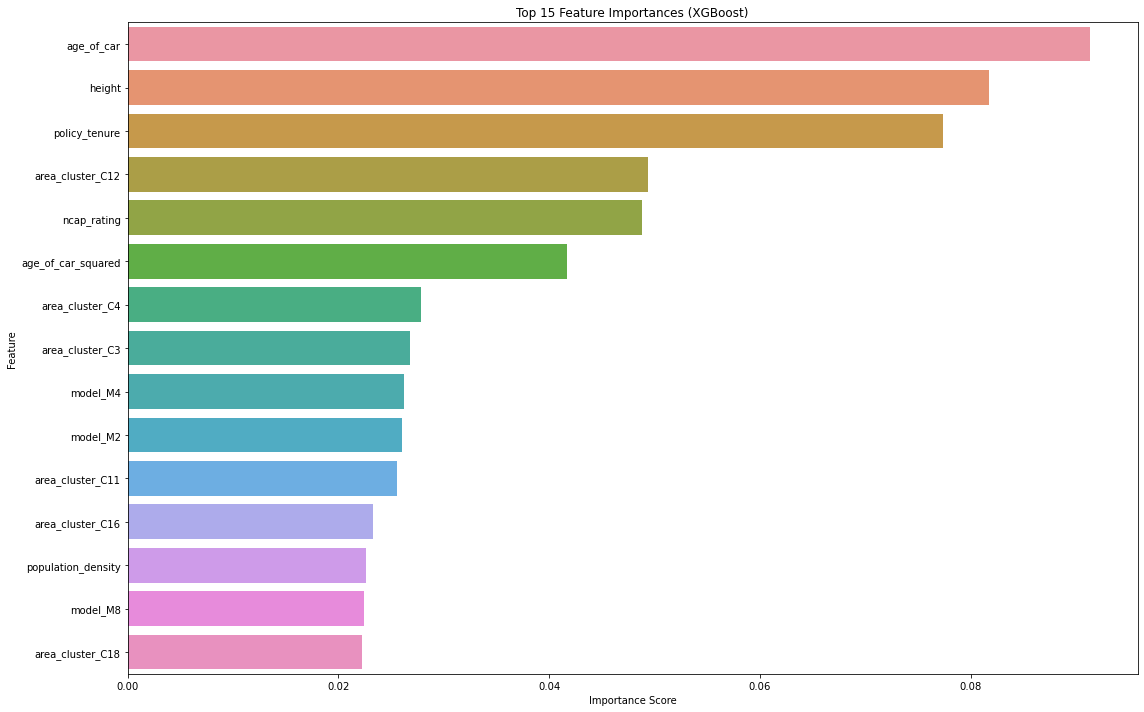

In [1471]:
importances = xgb_par.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(16, 10))
sns.barplot(x=importances[indices][:15], y=features[indices][:15])
plt.title("Top 15 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

***Insight:*** The above plot shows that age_of_car, policy_tenture, height and ncap_rating have the strongest influence on whether a claim is predicted correctly

## ***FINAL MODEL*** 

Several classification models were built when trying to identify the best in generalizing which policyholder is most likely to file a claim. The dataset was highly imbalanced with about 94% of policyholders unlikely to file a claim and only 6% were likely to do so. Careful model selection and evaluation were essential

The ROC-AUC metric was chosen as the evaluation measure because this is a binary classification task with imbalanced classes. Unlike accuracy, which can be misleading when one class dominates.; AUC works by evaluating  the model's ability to rank positive cases higher than negative ones which is crucial in insurance settings where identifying potential climants(true positives) is more crucial than minimizing false alarms.

The process began by building simple baseline models. A Logistic Regression moedl which had an ROC-AUC score of 0.58 ,a modest improvement over random guessing (0.5).Decision Tree followed and the two models were compared visually. Decision Tree, severely overfit the training data, scoring 1.00 in training but only 0.51 on the test set. Decided to go with the Logistic Regression for tuning to see if performance will improve. Despite tuning Logistic Regression, further gains were  very minimal, with the AUC improving by only small margins mostly less than 0.01. This plateau justified exploring more complex models like the Random Forest as the AUC score was still low (0.586).

Next, a Random Forest model was implemented and tuned, which improved performance to a ROC-AUC of 0.6490. That was a significant gain over the earlier models. However, tuning improvements also began to stagnate. Therefore, the decision was made to test XGBoost, a model well known for handling imbalanced data well. After tuning, XGBoost achieved the highest ROC-AUC score of 0.66, demonstrating the strongest balance between generalization and predictive power among the four models.
 
In colclusion XGBoost was selected as the final model due to its superior performance of better handling of class imbalance and reduced overfitting. Its ability to improve the AUC from 0.58 to 0.66 makes it a valid model for identifying high-risk policyholders in an imbalanced insurance dataset.


## **Suggestions for Improvement**

1. More robust feature engineering techniques could help extract more signal from the data
2. Trying more advanced Gradient Boosting Models - E.G., LightGBM or CatBoost which sometimes outperform XGBoost 
3. Collect More Data - Increasing the dataset size (features) to help model learn more patterns and improve generalization.